In [6]:
import json, requests
url_format = 'https://raw.githubusercontent.com/NuoWenLei/covid_tracking_by_state/main/state_data/alabama.csv'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
r = requests.get('https://raw.githubusercontent.com/NuoWenLei/covid_tracking_by_state/main/state_name_list.json', headers=headers)
r.text

'["alabama", "alaska", "american-samoa", "arizona", "arkansas", "california", "colorado", "connecticut", "delaware", "district-of-columbia", "florida", "georgia", "guam", "hawaii", "idaho", "illinois", "indiana", "iowa", "kansas", "kentucky", "louisiana", "maine", "maryland", "massachusetts", "michigan", "minnesota", "mississippi", "missouri", "montana", "nebraska", "nevada", "new-hampshire", "new-jersey", "new-mexico", "new-york", "north-carolina", "north-dakota", "northern-mariana-islands", "ohio", "oklahoma", "oregon", "pennsylvania", "puerto-rico", "rhode-island", "south-carolina", "south-dakota", "tennessee", "texas", "us-virgin-islands", "utah", "vermont", "virginia", "washington", "west-virginia", "wisconsin", "wyoming"]'

In [7]:
state_names = json.loads(r.text)

# Data Cleaning

In [8]:
from io import StringIO
import pandas as pd, numpy as np
state_pandas_dict_raw = {}

for state in state_names:
    print(state)
    r = requests.get('https://raw.githubusercontent.com/NuoWenLei/covid_tracking_by_state/main/state_data/{}.csv'.format(state), headers=headers)
    state_pandas_dict_raw[state] = pd.read_csv(StringIO(r.text))


alabama
alaska
american-samoa
arizona
arkansas
california
colorado
connecticut
delaware
district-of-columbia
florida
georgia
guam
hawaii
idaho
illinois
indiana
iowa
kansas
kentucky
louisiana
maine
maryland
massachusetts
michigan
minnesota
mississippi
missouri
montana
nebraska
nevada
new-hampshire
new-jersey
new-mexico
new-york
north-carolina
north-dakota
northern-mariana-islands
ohio
oklahoma
oregon
pennsylvania
puerto-rico
rhode-island
south-carolina
south-dakota
tennessee
texas
us-virgin-islands
utah
vermont
virginia
washington
west-virginia
wisconsin
wyoming


In [9]:
state_pandas_dict_raw[state_names[0]]

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-04,AL,10094.0,7920.0,65,2174.0,45807.0,45807.0,544.0,84,2666.0,NaN,1920535.0,4990,NaN,NaN,NaN,1513.0,NaN,498076,390672,922,0,NaN,NaN,NaN,NaN,NaN,295690.0,NaN,0,2311207,5890,NaN,NaN,118631.0,NaN,2311207,5890,NaN,0
1,2021-03-03,AL,10029.0,7872.0,38,2157.0,45723.0,45723.0,559.0,24,2662.0,NaN,1915545.0,7243,NaN,NaN,NaN,1510.0,NaN,497154,389772,2733,0,NaN,NaN,NaN,NaN,NaN,295690.0,NaN,0,2305317,9595,NaN,NaN,118154.0,NaN,2305317,9595,NaN,0
2,2021-03-02,AL,9991.0,7840.0,60,2151.0,45699.0,45699.0,631.0,51,2659.0,NaN,1908302.0,3161,NaN,NaN,NaN,1509.0,NaN,494421,387420,652,0,NaN,NaN,NaN,NaN,NaN,285130.0,NaN,0,2295722,3648,NaN,NaN,117904.0,NaN,2295722,3648,NaN,0
3,2021-03-01,AL,9931.0,7789.0,2,2142.0,45648.0,45648.0,651.0,220,2651.0,NaN,1905141.0,1450,NaN,NaN,NaN,1508.0,NaN,493769,386933,517,0,NaN,NaN,NaN,NaN,NaN,285130.0,NaN,0,2292074,1858,NaN,NaN,117746.0,NaN,2292074,1858,NaN,0
4,2021-02-28,AL,9929.0,7787.0,-1,2142.0,45428.0,45428.0,657.0,0,2650.0,NaN,1903691.0,2776,NaN,NaN,NaN,1508.0,NaN,493252,386525,569,0,NaN,NaN,NaN,NaN,NaN,285130.0,NaN,0,2290216,3265,NaN,NaN,117548.0,NaN,2290216,3265,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2020-03-11,AL,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,10.0,10,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10,10,NaN,NaN,NaN,NaN,10,10,NaN,0
359,2020-03-10,AL,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0
360,2020-03-09,AL,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0
361,2020-03-08,AL,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0


In [10]:
# find bad columns that is all nan
import matplotlib.pyplot as plt, seaborn as sns
state_pandas_dict = {}
nan_columns = []
all_columns = state_pandas_dict_raw[state].columns.values
must_columns = [i for i in all_columns if 'Increase' in i] + ['deathConfirmed', 'death']
good_states = []
print(must_columns)
for i, state in enumerate(state_names):
    state_pandas_dict[state] = state_pandas_dict_raw[state].drop(['state', 'date'], axis=1).astype('float64').fillna(0.0)
    print(state_pandas_dict[state].shape)
    for col in must_columns:
        if state_pandas_dict_raw[state][state_pandas_dict_raw[state][col].notna()].shape[0] < 200:
            print('State {} skipped due to insufficient data'.format(state))
            break
    else:
        good_states.append(state)
        for col in state_pandas_dict[state].columns.values:
            if state_pandas_dict[state][col].sum() == 0:
                if col not in nan_columns:
                    nan_columns.append(col)
print(len(nan_columns))

['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestEncountersViralIncrease', 'totalTestResultsIncrease', 'totalTestsPeopleViralIncrease', 'totalTestsViralIncrease', 'deathConfirmed', 'death']
(363, 39)
(364, 39)
(354, 39)
State american-samoa skipped due to insufficient data
(366, 39)
(364, 39)
State arkansas skipped due to insufficient data
(366, 39)
State california skipped due to insufficient data
(366, 39)
(370, 39)
(364, 39)
(365, 39)
State district-of-columbia skipped due to insufficient data
(401, 39)
State florida skipped due to insufficient data
(366, 39)
State georgia skipped due to insufficient data
(354, 39)
State guam skipped due to insufficient data
(366, 39)
(363, 39)
(366, 39)
(372, 39)
(364, 39)
State iowa skipped due to insufficient data
(364, 39)
State kansas skipped due to insufficient data
(364, 39)
(363, 39)
(363, 39)
(365, 39)
(408, 39)
(369, 39)
(364, 39)
(363, 39)
(363, 39)
State missouri skipped due to insufficient data

In [11]:
# Drop bad columns
for i, state in enumerate(good_states):
    state_pandas_dict[state] = state_pandas_dict[state].drop(nan_columns, axis=1)

In [12]:
# Rename state columns with their state name included
good_cols = state_pandas_dict[good_states[0]].columns.values
for state in good_states:
    new_cols = ['{} - {}'.format(state, i) for i in good_cols]
    state_pandas_dict[state].columns = new_cols

In [13]:
state_pandas_dict[good_states[0]].head()

,alabama - death,alabama - deathConfirmed,alabama - deathIncrease,alabama - hospitalizedCurrently,alabama - positive,alabama - positiveIncrease,alabama - totalTestResults,alabama - totalTestResultsIncrease
0,10094.0,7920.0,65.0,544.0,498076.0,922.0,2311207.0,5890.0
1,10029.0,7872.0,38.0,559.0,497154.0,2733.0,2305317.0,9595.0
2,9991.0,7840.0,60.0,631.0,494421.0,652.0,2295722.0,3648.0
3,9931.0,7789.0,2.0,651.0,493769.0,517.0,2292074.0,1858.0
4,9929.0,7787.0,-1.0,657.0,493252.0,569.0,2290216.0,3265.0


In [14]:
state_pandas_dict[good_states[0]].shape

(363, 8)

In [15]:
arr_lengths = []
for state in good_states:
    print('{}: {}'.format(state, state_pandas_dict[state].shape[0]))
    arr_lengths.append(state_pandas_dict[state].shape[0])
min_length = np.array(arr_lengths).min()
min_length

alabama: 363
alaska: 364
arizona: 366
colorado: 366
connecticut: 370
delaware: 364
hawaii: 366
idaho: 363
illinois: 366
indiana: 372
kentucky: 364
louisiana: 363
maine: 363
maryland: 365
massachusetts: 408
michigan: 369
minnesota: 364
mississippi: 363
new-jersey: 389
north-carolina: 366
ohio: 365
puerto-rico: 354
south-carolina: 366
tennessee: 365
vermont: 367
virginia: 403
washington: 417
west-virginia: 364
wisconsin: 367


354

In [16]:
for state in good_states:
    state_pandas_dict[state] = state_pandas_dict[state].head(min_length)
print(state_pandas_dict[good_states[0]].shape)

(354, 8)


# Visualize Death Data per State

<Figure size 432x288 with 0 Axes>

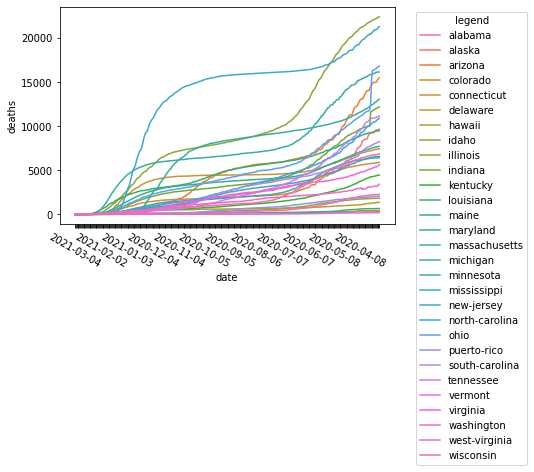

In [17]:
death_data = {'date':state_pandas_dict_raw[good_states[0]].head(min_length)['date'].values}
plt.figure()
for state in good_states:
    death_data[state] = state_pandas_dict_raw[state].sort_values('date', ascending=True).head(min_length)['death'].fillna(0).values
death_df = pd.DataFrame(death_data)
fig, ax = plt.subplots()
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(death_df, ['date']))
plt.legend(title='legend', bbox_to_anchor=(1.05, 1), loc='upper left')
every_nth = 30
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xticks(rotation=-30)
plt.ylabel('deaths')
plt.show()

# Find Correlation Array

## Try With first of state_names

In [18]:
df_dict_by_col = dict((col, state_pandas_dict[state_names[0]][col].values) for col in state_pandas_dict[state_names[0]].columns.values)

In [19]:
df_keys = df_dict_by_col.keys()

corr_data = []
for key0 in df_keys:
    key_row = []
    for key1 in df_keys:
        key_row.append(np.corrcoef(df_dict_by_col[key0], df_dict_by_col[key1])[1,0])
    corr_data.append(key_row)
corr_np = np.float64(corr_data)
corr_np

array([[1.        , 0.99628253, 0.51948179, 0.52389465, 0.97544758,
        0.44213999, 0.93403598, 0.1507257 ],
       [0.99628253, 1.        , 0.5129809 , 0.56338023, 0.98333664,
        0.48379468, 0.95902426, 0.18056535],
       [0.51948179, 0.5129809 , 1.        , 0.42919816, 0.5351837 ,
        0.45838197, 0.48158829, 0.17382066],
       [0.52389465, 0.56338023, 0.42919816, 1.        , 0.66935429,
        0.83935024, 0.69777342, 0.37174191],
       [0.97544758, 0.98333664, 0.5351837 , 0.66935429, 1.        ,
        0.57734761, 0.97508886, 0.19486688],
       [0.44213999, 0.48379468, 0.45838197, 0.83935024, 0.57734761,
        1.        , 0.6287938 , 0.45762283],
       [0.93403598, 0.95902426, 0.48158829, 0.69777342, 0.97508886,
        0.6287938 , 1.        , 0.26102342],
       [0.1507257 , 0.18056535, 0.17382066, 0.37174191, 0.19486688,
        0.45762283, 0.26102342, 1.        ]])

In [20]:
corr_df = pd.DataFrame(corr_np)
corr_df

,0,1,2,3,4,5,6,7
0,1.000000,0.996283,0.519482,0.523895,0.975448,0.442140,0.934036,0.150726
1,0.996283,1.000000,0.512981,0.563380,0.983337,0.483795,0.959024,0.180565
2,0.519482,0.512981,1.000000,0.429198,0.535184,0.458382,0.481588,0.173821
3,0.523895,0.563380,0.429198,1.000000,0.669354,0.839350,0.697773,0.371742
4,0.975448,0.983337,0.535184,0.669354,1.000000,0.577348,0.975089,0.194867
5,0.442140,0.483795,0.458382,0.839350,0.577348,1.000000,0.628794,0.457623
6,0.934036,0.959024,0.481588,0.697773,0.975089,0.628794,1.000000,0.261023
7,0.150726,0.180565,0.173821,0.371742,0.194867,0.457623,0.261023,1.000000


In [21]:
state_pandas_dict[state_names[0]].columns.shape

(8,)

In [22]:
def get_corr_list(pointers, corr_np):
    ordered_ls_left = [pointers[0]]
    ordered_ls_right = [pointers[1]]
    corr_ls_sum = 0


    visited = set(pointers.copy())
    all_cols = corr_np.shape[0]

    # Find highest unvisited correlated element
    def get_max(p, visits): 
        # print(p)
        s = sorted(list(enumerate(corr_np[p])),key=lambda x: x[1], reverse=True)
        for item in s:
            if item[0] == i or item[0] in visits:
                continue
            return item
        

    while len(visited) < all_cols:
        # print(pointers)
        val = get_max(pointers[0], visited)
        if val is None:
            break
        pointers[0], corr_val = val
        visited.add(pointers[0])
        ordered_ls_left.append(pointers[0])
        corr_ls_sum += corr_val
        
        val = get_max(pointers[1], visited)
        if val is None:
            break
        pointers[1], corr_val = val
        visited.add(pointers[1])
        ordered_ls_right.append(pointers[1])
        corr_ls_sum += corr_val

    ordered_ls = ordered_ls_left + list(reversed(ordered_ls_right))
    print(len(ordered_ls))
    print(corr_ls_sum)
    return ordered_ls, corr_ls_sum

In [23]:
def get_corr_list_v2(corr_np):
    pointer = 0
    ordered_ls = [0]
    visited = set([0])
    all_cols = corr_np.shape[0]
    corr_val_dict = {}
    def get_max(p, visits): 
        # print(p)
        s = sorted(list(enumerate(corr_np[p])),key=lambda x: x[1], reverse=True)
        for item in s:
            if item[0] == p or item[0] in visits:
                continue
            return item


    while len(visited) < all_cols:
        val = get_max(pointer, visited)
        if val is None:
            break
        new_pointer, corr_val = val
        visited.add(new_pointer)
        ordered_ls.append(new_pointer)
        corr_val_dict['{}-{}'.format(pointer, new_pointer)] = corr_val
        pointer = new_pointer
    #Complete circle by routing last pointer to first pointer, which is 0
    corr_val_dict['{}-{}'.format(pointer, 0)] = corr_np[pointer, 0]


    return corr_val_dict, ordered_ls




In [24]:
def get_corr_np(df):
    df_dict_by_col = dict((col, df[col].values) for col in df.columns.values)
    df_keys = df_dict_by_col.keys()
    corr_data = []
    for key0 in df_keys:
        key_row = []
        for key1 in df_keys:
            key_row.append(np.corrcoef(df_dict_by_col[key0], df_dict_by_col[key1])[1,0])
        corr_data.append(key_row)
    corr_np = np.float64(corr_data)
    return corr_np

In [25]:
def corr_list_by_df(df):
    df_dict_by_col = dict((col, df[col].values) for col in df.columns.values)
    df_keys = df_dict_by_col.keys()
    corr_data = []
    for key0 in df_keys:
        key_row = []
        for key1 in df_keys:
            key_row.append(np.corrcoef(df_dict_by_col[key0], df_dict_by_col[key1])[1,0])
        corr_data.append(key_row)
    corr_np = np.float64(corr_data)
    all_ordered_ls = []
    corr_sum_list = []
    for i in range(corr_np.shape[0]):
        for j in range(i+1, corr_np.shape[1]):
            ls, corr_sum = get_corr_list([i, j], corr_np)
            all_ordered_ls.append(ls)
            corr_sum_list.append(corr_sum)
    corr_sum_np = np.array(corr_sum_list)
    best_ordered_ls = all_ordered_ls[np.argmax(corr_sum_np)]
    print(np.max(corr_sum_np))
    print(best_ordered_ls)
    return best_ordered_ls, corr_np

In [26]:
# Create full df by combining data for all 
full_df = state_pandas_dict[good_states[0]].copy()
for state in good_states[1:]:
    for col in state_pandas_dict[state].columns.values:
        full_df[col] = state_pandas_dict[state][col].values
full_df.shape

(354, 232)

In [27]:
full_order_dict, circle_order = get_corr_list_v2(get_corr_np(full_df))

In [28]:
circle_order

[0,
 1,
 16,
 17,
 176,
 177,
 136,
 94,
 142,
 190,
 126,
 230,
 166,
 70,
 38,
 102,
 198,
 118,
 78,
 222,
 30,
 56,
 57,
 172,
 169,
 168,
 110,
 158,
 206,
 150,
 214,
 46,
 22,
 182,
 185,
 156,
 204,
 80,
 81,
 152,
 153,
 140,
 4,
 188,
 212,
 225,
 224,
 76,
 28,
 124,
 12,
 132,
 68,
 60,
 14,
 134,
 86,
 54,
 52,
 48,
 49,
 184,
 217,
 216,
 220,
 164,
 8,
 84,
 44,
 36,
 116,
 148,
 72,
 73,
 108,
 128,
 129,
 64,
 24,
 25,
 65,
 105,
 104,
 40,
 41,
 112,
 32,
 145,
 144,
 113,
 89,
 88,
 201,
 200,
 208,
 92,
 180,
 20,
 97,
 96,
 100,
 196,
 192,
 120,
 121,
 161,
 160,
 6,
 62,
 137,
 174,
 33,
 228,
 155,
 3,
 187,
 219,
 83,
 163,
 75,
 131,
 29,
 69,
 227,
 11,
 59,
 77,
 221,
 109,
 211,
 99,
 205,
 203,
 43,
 107,
 106,
 115,
 147,
 35,
 114,
 146,
 34,
 37,
 125,
 127,
 171,
 167,
 71,
 79,
 31,
 223,
 159,
 111,
 207,
 119,
 103,
 231,
 61,
 229,
 13,
 133,
 135,
 165,
 85,
 157,
 181,
 183,
 197,
 117,
 149,
 45,
 101,
 218,
 5,
 141,
 139,
 179,
 19,
 21,
 23,


In [29]:
def best_ord_from_circle(d, circle):
    items = sorted(d.items(), key=lambda x: x[1], reverse=True)
    start, end = items[-1][0].split('-')
    start_point, end_point = circle.index(int(start)), circle.index(int(end))

    if end_point < start_point:
        return circle
    return list(reversed(circle[:circle.index(start)+1])) + circle[circle.index(end):]



In [30]:
full_order_v2 = best_ord_from_circle(full_order_dict, circle_order)
len(full_order_v2)

232

In [31]:
# Manually Entering Here because running the function takes too long
full_order = [28, 124, 224, 225, 68, 30, 78, 222, 182, 185, 156, 184, 118, 84, 8, 76, 164, 220, 216, 217, 44, 36, 96, 97, 100, 196, 80, 81, 152, 153, 136, 94, 142, 190, 62, 6, 200, 201, 208, 137, 88, 89, 104, 105, 41, 40, 121, 120, 148, 160, 20, 12, 48, 49, 52, 119, 83, 163, 75, 219, 187, 3, 155, 99, 43, 107, 149, 197, 181, 183, 47, 111, 79, 77, 221, 109, 45, 165, 27, 123, 67, 66, 26, 130, 85, 223, 186, 218, 101, 157, 154, 18, 82, 2, 138, 98, 58, 173, 9, 193, 191, 189, 135, 226, 194, 74, 162, 151, 178, 202, 115, 114, 175, 210, 143, 50, 42, 215, 10, 15, 87, 7, 63, 51, 53, 55, 199, 39, 170, 125, 127, 95, 93, 90, 91, 122, 37, 34, 146, 147, 106, 35, 195, 117, 213, 207, 103, 209, 139, 141, 5, 61, 171, 231, 229, 133, 13, 59, 11, 131, 227, 69, 29, 31, 167, 71, 159, 23, 21, 19, 179, 33, 113, 112, 174, 145, 144, 32, 203, 211, 205, 192, 116, 161, 72, 73, 25, 65, 64, 24, 129, 128, 108, 92, 177, 176, 17, 16, 1, 0, 212, 204, 180, 22, 14, 134, 214, 206, 198, 102, 38, 169, 168, 54, 86, 230, 126, 166, 70, 110, 158, 150, 46, 140, 4, 188, 56, 57, 172, 60, 228, 132]

In [32]:
#full_order, full_corr = corr_list_by_df(full_df)

In [33]:
test_order, test_corr = corr_list_by_df(state_pandas_dict['alabama'])

8
4.119440919647699
8
4.160380490760433
8
4.24397033141963
8
4.050366399826602
8
4.312949954532416
8
3.998920208754184
8
4.680879255423979
8
4.135392208751277
8
4.236081277433167
8
4.010880817841161
8
4.305060900545953
8
3.959434626768743
8
4.672990201437514
8
4.243970331419631
8
4.000770338509906
8
4.312949954532416
8
3.846917672464898
8
4.509549363271225
8
4.080077193362879
8
3.873299462086321
8
3.937387954743997
8
4.125174009581941
8
4.297248037975223
8
4.013405535677349
8
4.63982637505258
8
4.016973505712936
8
4.217180694992925
8
4.680879255423979
4.680879255423979
[0, 1, 4, 6, 2, 3, 5, 7]


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
full_np = scaler.fit_transform(full_df)

In [35]:
test_full_df = pd.DataFrame(full_np)
img_np = test_full_df[full_order_v2].values

In [36]:
horizontal_img_np = np.swapaxes(img_np,0,1)

In [37]:
horizontal_img_np[:, :7]*255

array([[255.        , 253.35793541, 252.39795918, ..., 250.83168219,
        250.85694472, 249.31593026],
       [255.        , 253.45454545, 252.42424242, ..., 250.71780303,
        250.71780303, 249.01136364],
       [255.        , 253.48748842, 253.03058387, ..., 251.77015755,
        251.56533828, 250.46246525],
       ...,
       [ 14.7404271 ,  14.7404271 ,   0.        , ...,  20.37371134,
         19.81038292,  20.1859352 ],
       [  8.36065574,  16.72131148,   8.36065574, ...,   8.36065574,
         16.72131148,  16.72131148],
       [ 27.0541631 ,  26.84724789,  27.19498039, ...,  27.48811026,
         27.28981653,  27.4536244 ]])

In [38]:
from PIL import Image
im = Image.fromarray(horizontal_img_np[:, :128]*255, 'L')
im.show()

In [39]:
horizontal_img_np.shape

(232, 354)

# TODO: Make Predict Values and use time series data to split numpy array into hundreds of 232x128 images

In [40]:
#full_df.head()
y_val_columns = [i for i in full_df.columns.values if 'deathIncrease' in i]
y_val_columns

['alabama - deathIncrease',
 'alaska - deathIncrease',
 'arizona - deathIncrease',
 'colorado - deathIncrease',
 'connecticut - deathIncrease',
 'delaware - deathIncrease',
 'hawaii - deathIncrease',
 'idaho - deathIncrease',
 'illinois - deathIncrease',
 'indiana - deathIncrease',
 'kentucky - deathIncrease',
 'louisiana - deathIncrease',
 'maine - deathIncrease',
 'maryland - deathIncrease',
 'massachusetts - deathIncrease',
 'michigan - deathIncrease',
 'minnesota - deathIncrease',
 'mississippi - deathIncrease',
 'new-jersey - deathIncrease',
 'north-carolina - deathIncrease',
 'ohio - deathIncrease',
 'puerto-rico - deathIncrease',
 'south-carolina - deathIncrease',
 'tennessee - deathIncrease',
 'vermont - deathIncrease',
 'virginia - deathIncrease',
 'washington - deathIncrease',
 'west-virginia - deathIncrease',
 'wisconsin - deathIncrease']

In [41]:
y_val = np.zeros(full_df.shape[0])
for col in y_val_columns:
    y_val += full_df[col].values
y_val


array([ 668., 1069.,  582.,  559.,  484.,  800.,  967., 1083., 1120.,
       1042.,  456.,  602.,  807., 1003., 1221.,  980.,  533.,  371.,
        427., 2008., 3692., 2012., 1670., 1207.,  591.,  543., 1119.,
       1531., 3163., 1690., 1521.,  760.,  689., 1178., 1469., 1753.,
       1753., 1819.,  621.,  725., 1609., 1603., 1764., 1762.,  848.,
        578.,  789., 1563., 1428., 1688., 1811., 1929.,  729.,  869.,
       1533., 1690., 2066., 1761., 1825.,  846.,  771., 1273.,  933.,
       1421., 1929., 1767.,  851.,  662.,  931.,  593., 1287., 1673.,
       1691.,  762.,  765., 1301., 1454., 1894., 1730., 1487.,  720.,
        729., 1304., 1276., 1664., 1716., 1386.,  655.,  560., 1272.,
       1280., 1571., 1562., 1452.,  605.,  420.,  664.,  868.,  661.,
       1267., 1265.,  407.,  462.,  794.,  984., 1173., 1021.,  928.,
        352.,  352.,  700.,  749.,  571.,  894.,  771.,  343.,  281.,
        587.,  583.,  605.,  596.,  642.,  210.,  188.,  509.,  481.,
        515.,  510.,

In [42]:
y_val.shape

(354,)

In [43]:
TIME_LENGTH = 128
TIME_TEST_LENGTH = 1
def get_x_y(data, predict_vals, batch_size, test_length):
    total_length = data.shape[1]
    useable_starts = total_length - test_length - batch_size
    images = []
    y = []
    for i in range(0, useable_starts):
        images.append(data[:, i:i+batch_size])
        y.append(predict_vals[i+batch_size:i+batch_size+test_length])
    images_np = np.array(images)
    return images_np.reshape((images_np.shape[0], images_np.shape[1], images_np.shape[2], 1)), np.array(y)

imgs, y_values = get_x_y(horizontal_img_np, y_val, TIME_LENGTH, TIME_TEST_LENGTH)
print(imgs.shape)
print(y_values.shape)


(225, 232, 128, 1)
(225, 1)


In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, Dense, LSTM, SimpleRNN, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential

X_train, X_test, y_train, y_test = train_test_split(imgs, y_values, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(180, 232, 128, 1) (45, 232, 128, 1) (180, 1) (45, 1)


In [45]:
def get_corr_img_cnn_model(feature_length, time_length, pred_length):
    model = Sequential()
    model.add(Conv2D(128, (3,3), input_shape=(feature_length, time_length, 1), padding='same', activation='relu'))
    model.add(AveragePooling2D())
    model.add(Dropout(0.3))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(AveragePooling2D())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(pred_length, activation='relu'))
    model.compile(
        loss='mse',
        optimizer='adam',
        metrics=['mse', 'mae']
    )
    print(model.summary())
    return model

model = get_corr_img_cnn_model(X_train.shape[1], TIME_LENGTH, TIME_TEST_LENGTH)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 232, 128, 128)     1280      
_________________________________________________________________
average_pooling2d (AveragePo (None, 116, 64, 128)      0         
_________________________________________________________________
dropout (Dropout)            (None, 116, 64, 128)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 116, 64, 64)       73792     
_________________________________________________________________
average_pooling2d_1 (Average (None, 58, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 58, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 118784)            0

In [46]:
history = model.fit(X_train, y_train, epochs=3000)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
6/6 [==============================] - 0s 66ms/step - loss: 680.6218 - mse: 680.6218 - mae: 20.2865
Epoch 502/3000
6/6 [==============================] - 0s 64ms/step - loss: 495.2132 - mse: 495.2132 - mae: 16.4459
Epoch 503/3000
6/6 [==============================] - 0s 64ms/step - loss: 652.2351 - mse: 652.2351 - mae: 19.5760
Epoch 504/3000
6/6 [==============================] - 0s 65ms/step - loss: 659.7538 - mse: 659.7538 - mae: 18.7920
Epoch 505/3000
6/6 [==============================] - 0s 64ms/step - loss: 704.3829 - mse: 704.3829 - mae: 19.5579
Epoch 506/3000
6/6 [==============================] - 0s 66ms/step - loss: 582.2292 - mse: 582.2292 - mae: 17.8692
Epoch 507/3000
6/6 [==============================] - 0s 66ms/step - loss: 611.7241 - mse: 611.7241 - mae: 19.1721
Epoch 508/3000
6/6 [==============================] - 0s 64ms/step - loss: 723.6018 - mse: 723.6018 - mae: 21.1135
Epoch 509/3000
6/6 [=========

In [48]:
def get_normal_lstm_model(feature_length, time_length, pred_length, batch_size):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, stateful=True, batch_size=batch_size, input_shape=(feature_length, time_length)))
    model.add(LSTM(64, return_sequences=False, stateful=True))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(pred_length, activation='relu'))
    model.compile(
        loss='mse',
        optimizer='adam',
        metrics=['mse', 'mae']
    )
    print(model.summary())
    return model

In [49]:
X_v2, y_v2 = get_x_y(horizontal_img_np, y_val, 128, TIME_TEST_LENGTH)

In [50]:
X_v2 = X_v2.reshape(X_v2.shape[0], X_v2.shape[1], X_v2.shape[2])
y_v2 = y_v2.reshape(y_v2.shape[0])
print(X_v2.shape, y_v2.shape)

(225, 232, 128) (225,)


In [51]:
BATCH_SIZE = 15

In [52]:
model_v2 = get_normal_lstm_model(X_v2.shape[1], TIME_LENGTH, TIME_TEST_LENGTH, BATCH_SIZE)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (15, 232, 128)            131584    
_________________________________________________________________
lstm_1 (LSTM)                (15, 64)                  49408     
_________________________________________________________________
dense_2 (Dense)              (15, 100)                 6500      
_________________________________________________________________
dense_3 (Dense)              (15, 1)                   101       
Total params: 187,593
Trainable params: 187,593
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
full_df.shape

(354, 232)

In [54]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_v2, y_v2, random_state=0, train_size=0.8)

In [55]:
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(180, 232, 128) (45, 232, 128) (180,) (45,)


In [56]:
history = model_v2.fit(X_train2, y_train2, batch_size=BATCH_SIZE, epochs=10)

Epoch 1/10
12/12 [==============================] - 2s 27ms/step - loss: 329238.1827 - mse: 329238.1827 - mae: 470.0146
Epoch 2/10
12/12 [==============================] - 0s 19ms/step - loss: 315328.3077 - mse: 315328.3077 - mae: 463.9044
Epoch 3/10
12/12 [==============================] - 0s 18ms/step - loss: 393103.7861 - mse: 393103.7861 - mae: 514.8056
Epoch 4/10
12/12 [==============================] - 0s 18ms/step - loss: 368894.5889 - mse: 368894.5889 - mae: 495.1572
Epoch 5/10
12/12 [==============================] - 0s 18ms/step - loss: 318809.2776 - mse: 318809.2776 - mae: 466.1826
Epoch 6/10
12/12 [==============================] - 0s 18ms/step - loss: 333939.2151 - mse: 333939.2151 - mae: 469.1104
Epoch 7/10
12/12 [==============================] - 0s 18ms/step - loss: 305427.9567 - mse: 305427.9567 - mae: 451.1967
Epoch 8/10
12/12 [==============================] - 0s 18ms/step - loss: 324425.3606 - mse: 324425.3606 - mae: 469.4753
Epoch 9/10
12/12 [======================

# Make into category prediction instead of regression

In [78]:
def split_category(y, num_categories):
  m = np.max(y)
  cutoff = m/num_categories
  categorical_y = []
  for val in y:
    onehot = np.zeros(num_categories)
    for i in range(num_categories):
      if (i*cutoff) <= val <= ((i+1)*cutoff):
        onehot[i] = 1
        categorical_y.append(onehot)
        break
  return np.array(categorical_y)


In [81]:
def get_categorical_cnn_model(feature_length, time_length, pred_categories):
    model = Sequential()
    model.add(Conv2D(128, (3,3), input_shape=(feature_length, time_length, 1), padding='same', activation='relu'))
    model.add(AveragePooling2D())
    model.add(Dropout(0.3))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(AveragePooling2D())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(pred_categories, activation='softmax'))
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    print(model.summary())
    return model
  

In [82]:
NUM_CATEGORIES = 4

X_v3, y_v3_raw = get_x_y(horizontal_img_np, y_val, TIME_LENGTH, TIME_TEST_LENGTH)
y_v3 = split_category(y_v3_raw, NUM_CATEGORIES)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_v3, y_v3, random_state=0, train_size=0.8)
print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

(180, 232, 128, 1) (45, 232, 128, 1) (180, 4) (45, 4)


In [102]:
model_v3 = get_categorical_cnn_model(X_train3.shape[1], TIME_LENGTH, NUM_CATEGORIES)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 232, 128, 128)     1280      
_________________________________________________________________
average_pooling2d_18 (Averag (None, 116, 64, 128)      0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 116, 64, 128)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 116, 64, 64)       73792     
_________________________________________________________________
average_pooling2d_19 (Averag (None, 58, 32, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 58, 32, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 118784)          

In [103]:
history = model_v3.fit(X_train3, y_train3, batch_size=1, epochs=50)

Epoch 1/50
180/180 [==============================] - 2s 6ms/step - loss: 1.3528 - accuracy: 0.4110
Epoch 2/50
180/180 [==============================] - 1s 6ms/step - loss: 0.9422 - accuracy: 0.5270
Epoch 3/50
180/180 [==============================] - 1s 6ms/step - loss: 0.9813 - accuracy: 0.5267
Epoch 4/50
180/180 [==============================] - 1s 6ms/step - loss: 0.8205 - accuracy: 0.5242
Epoch 5/50
180/180 [==============================] - 1s 6ms/step - loss: 0.7789 - accuracy: 0.4853
Epoch 6/50
180/180 [==============================] - 1s 6ms/step - loss: 0.8643 - accuracy: 0.5720
Epoch 7/50
180/180 [==============================] - 1s 6ms/step - loss: 0.8216 - accuracy: 0.5237
Epoch 8/50
180/180 [==============================] - 1s 6ms/step - loss: 0.6754 - accuracy: 0.6462
Epoch 9/50
180/180 [==============================] - 1s 6ms/step - loss: 0.7410 - accuracy: 0.5638
Epoch 10/50
180/180 [==============================] - 1s 6ms/step - loss: 0.7886 - accuracy: 0.5901

In [104]:
model_v3.evaluate(X_test3, y_test3, batch_size=1)

45/45 [==============================] - 0s 2ms/step - loss: 0.7655 - accuracy: 0.7556


[0.7654569745063782, 0.7555555701255798]

In [105]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


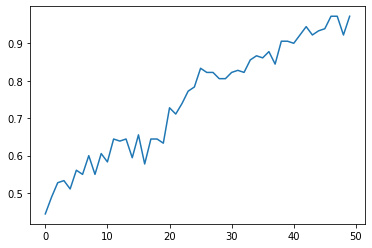

In [106]:
import matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

history_time = [i for i in range(len(history.history['loss']))]

sns.lineplot(x=history_time, y=history.history['accuracy'])